<a href="https://colab.research.google.com/github/nabil4247/DataWarehouse-DataMining/blob/main/Analysis%20and%20Prediction%20at%20Zomato%20Bangalore%20Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis and Prediction at Zomato Bangalore Restaurants**



---



![picture](https://drive.google.com/uc?id=1oAqESorjYv7RkMQ9nR-l-I1aGlmOOiGp)


# Introduction

Bengaluru (juga disebut Bangalore) adalah ibu kota negara bagian Karnataka selatan India. Dengan keberangaman budaya makanan yang dimana seluruh restoran dari seluruh penjuru dunia dapat ditemukan di kota Bengaluru. 

Dimulai dari makanan Amerika ke Jepang, Russia ke Antartica, semua jenis makanan dapat ditemukan di kota ini.

Bengaluru merupakan kota dengan keberagaman jenis penyediaan makanan yang banyak Delivery, Dine-out, Pubs, Bars, Drinks, Buffet, Desserts. Semua dapat ditemukan di Bengaluru. 

Pertumbuhan restoran setiap hari semakin berkembang dan sudah ada sekitar 12.000 restoran


Data Zomato ini bertujuan untuk menganalisis demografi lokasi. Dataset zomato ini didapatkan dari https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants untuk digunakan dalam melakukan data eksplorasi analisis dan prediksi restoran yang ada di kota Bengaluru. 

# Acknowledgements

Dataset ini hanya digunakan untuk keperluan pendidikan. Dataset ini merupakan milik penuh oleh Zomato Media Pvt. Ltd., dan dataset ini disajikan secara gratis oleh Himanshu Poddar https://www.kaggle.com/himanshupoddar pada 31 Maret 2019.

# Daftar Isi

1. **Load the Dataset**: Upload dataset di Google Drive dan memuat data nya ke dalam Google Colab, dan meng-import library yang akan dibutuhkan


---



2. **Data Cleaning and Data Preparation**: 
- Menghapus kolom yang tidak diperlukan
- Menghapus data yang terduplikasi
- Menghapus data bernilai kosong (NaN) di dataset
- Mengubah nama kolom
- Melakukan transformasi
- Menghapus kata yang tidak diperlukan
- Menyesuaikan kembali nama kolom
- Melakukan encode pada variable input
- Mencari korelasi antara variable yang beda
- Menentukan variable independent dan variable dependent


---



3. **Regression Analysis**: 
- Linear Regression
- Decision Tree Regression



---


4. **Data Visualization**: Menggunakan plot untuk menemukan hubungan antara fitur. Sehingga lebih memudahkan dalam membaca data.
- Restoran paling terkenal di Bangalore
- Restoran dengan biaya termahal 
- Jenis-jenis layanan
- Lokasi yang paling sering dikunjungi
- Masakan paling populer
- Restoran yang menyediakan jasa online dan hanya offline
- Hubungan antara opsi pesanan online dan peringkat restoran
- Hubungan antara type restoran dengan rating restoran


---





## 1. Load Dataset and Importing Libraries

Melakukan upload dataset di Google Drive dan melakukan load (muat) data di Google Colab. Dan dengan meng-import library yang akan digunakan

In [ ]:
#Importing Libraries
import numpy as np #NumPy adalah paket pemrosesan array tujuan umum.
import pandas as pd #Berisi struktur data tingkat tinggi dan alat manipulasi yang dirancang untuk membuat analisis data cepat dan mudah.
import matplotlib.pyplot as plt #Berguna sebagai Plotting Library
import seaborn as sns #Pustaka visualisasi data Python berdasarkan matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression adalah algoritma klasifikasi Machine Learning
from sklearn.linear_model import LinearRegression #Linear Regression adalah algoritma klasifikasi Machine Learning
from sklearn.model_selection import train_test_split #Pemisahan dari Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

**1.1 Membaca Dataset**

In [ ]:
#proses pembacaan dataset ke dalam Google Colab
zomato_orgnl=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset-UAS-DWDM/zomato.csv")
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# 2. Data Cleaning

Data Cleaning dilakukan sebagai bagian dari tahapan data preparation. Proses ini dilakukan karena nantinya akan mempengaruhi hasil dari Data Mining yang diinginkan. 

Beberapa dataset yang akan digunakan untuk modelling tidak dalam kondisi siap pakai yang dimana harus direkontruksi ataupun dihilangkan beberapa kolom nya. 




**2.1 Menghapus kolom yang tidak diperlukan**


Menghapus kolom: 

- `url` = link url tidak akan diperlukan dalam melakukan eksplorasi
- `dish_liked` = beberapa user tidak mengisi dan terlalu banyak items yang ada dan tidak terlalu diperlukan
- `phone` = sifatnya tidak terlalu diperlukan karena hanyalah angka-angka untuk panggilan saja 



In [ ]:
#Menghapus kolom yang tidak diperlukan
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1) 

**2.2 Menghapus data yang terduplikasi**

Menghapus data-data yang terduplikasi, berguna agar eksplorasi data dapat sesuai karena tidak ada data-data yang sama yang akan mempengerahui akurasi hasil akhir nantinya.

Untuk melakukannya menggunakan 2 function yaitu:
- `duplicated()` = untuk mencari data-data yang sama
- `drop_duplicates()` = untuk menghapus data-data yang telah terindikasi terduplikasi

In [ ]:
#Menghapus duplikasi
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

**2.3 Menghapus data bernilai kosong (NaN) di dataset**

Missing Values adalah nilai yang tidak terdefinsi atau kosong di dataset seperti NaN (Not a Number) atau NA (Not Available). 

Ada yang berbentuk kosong atau simbol-simbol tertentu, yang tidak dapat digunakan sebagai data mining dan akan mempengaruhi hasil akhirnya. 

Untuk melakukannya dapat menggunakan:

- `isnull()` = untuk mengidentifikasi data-data yg missing values
- `dropna()` = dan menghapusnya dengan fungsi drop
- `info()` = untuk melihat informasi data data yang telah diproses

In [ ]:
#Menghapus data bernilai kosong NAN/NA pada dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

**2.4 Mengubah nama kolom**

Melakukan perubahan nama kolom, sehingga saat disajikan menjadi lebih mudah dipahami.

kolom `approx_cost(for two people)` akan diubah menjadi `price` sehingga menjadi lebih simple.

In [ ]:
#Mengganti nama kolom
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'price','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'price', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

**2.5 Melakukan beberapa transformasi**

Transformasi Data adalah upaya yang dilakukan dengan tujuan utama untuk mengubah skala pengukuran data asli menjadi bentuk lain sehingga data dapat memenuhi asumsi-asumsi yang mendasari analisis ragam

Melakukan transformasi data pada kolom: `price`

In [ ]:
#Transformasi
zomato['price'] = zomato['price'].astype(str)
zomato['price'] = zomato['price'].apply(lambda x: x.replace(',','.'))
zomato['price'] = zomato['price'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   price         43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


**2.6 Menghapus kata `"/5"` dari tabel `Rates`**

Menghapus kata `"/5"` karena pada dataset mentah, yaitu memiliki format contoh: `"4.1/5"` yang memiliki arti atau dibaca "Memiliki rating bintang empat koma satu, dari bintang lima"

Karena `"/5"` "per lima" tidak digunakan maka akan dihapus dan diganti dengan `' '` menggunakan function `replace`

In [ ]:
#Menghapus '/5' dari Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

**2.7 Menyesuaikan nama kolom**

Melakukan penyesuaian nama kolom, sehingga dalam pengambilan data menjadi lebih mudah dan lebih tersturktur

Yang akan disesuikan yaitu kolom `online_order` dan `book_table`

In [ ]:
# Penyesuaian nama kolom
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.price.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

**2.8 Melakukan encode pada variable input-an**

untuk mengubah data nominal menjadi data numerikal, sehingga hasil inputan dapat dipergunakan untuk hasil akhir yang diinginkan. 

Kolom yang akan dilakukan encode yaitu `rate`, `price` dan `votes`

In [ ]:
#Encode pada variable input
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'price', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

**2.9 Mencari korelasi atara variable yang berbeda**

Dilakukan pencarian korelasi dengan menggunakan metode `kendall` yaitu statistik nonparametrik dengan skala pengukuran data sekurang-kurangnya data ordinal. 

Korelasi kendall digunakan untuk mengukur tingkat kesesuaian yakni apakah ada perbedaan tingkat kesesuain ranking antara 2 variabel yang diamati pada kolom-kolom dan data yang ada

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'price', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

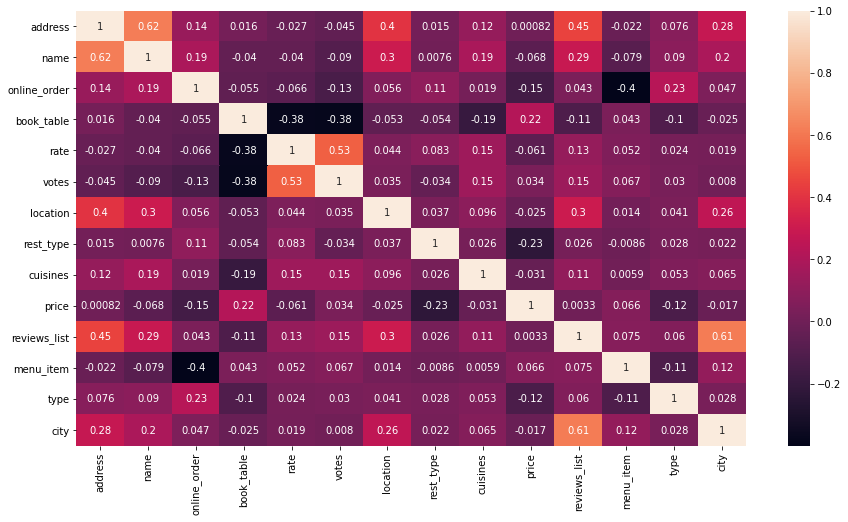

In [ ]:
#Melakukan korelasi
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

**2.10 Menentukan variabel independent dan variabel dependent**

Variabel independetn (juga disebut sebagai Fitur) yaitu input untuk proses yang sedang dianalisis. Sedangkan Variabel Dependent adalah output dari proses.

Yang akan dilakukan pada kolom `rate`

In [ ]:
#Menentukan variable pada kolom 'rate'
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

#Melakukan test dan Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

# 3. Regression Analysis

Regresi merupakan teknik pemodelan statistik
untuk mengetahui hubungan dua atau lebih variabel atau
untuk memprediksi nilai dari satu variabel respon atau
dependent dengan menggunakan nilai dari variabel-variabel
predictor / independent. 

Dalam analisis regresi ada satu atau
lebih variabel independent/predictor yang biasa diwakili
dengan notasi X dan satu variabel respon yang biasa diwakili
dengan notasi Y. 

Pada percobaan ini akan menggunakan 2 teknik dari Regression Analysis yaitu: `LinearRegression()` dan `DecisionTreeRegressor` 




**3.1 Linear Regression**


Linear Regression bekerja dengan memodelkan hubungan antara dua variable dengan memasangkan persamaan linear untuk mengamati dataset yang ada. Berfungsi untuk menemukan hubungan matematis yang ada antar variable.

Untuk menyiapkan Model Linear Regression, dapat menggunakan function `LinearRegression()`

In [ ]:
#Melakukan pemodelan Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2736233722103949

**3.2 Decision Tree Regression**

Yaitu salah satu metode klasifikasi yang banyak digunakan, karena mudah untuk dipahami oleh manusia. Dengan bentul model berhirarki atau struktur pohon.

Cara kerja Decision tree yaitu dengan mengubah data mentah menjadi decision tree dengan aturan-aturan keputusan. Berguna untuk memberikan data terperinci yang sebelumnya kompleks menjadi lebih mudah. 

Untuk menyiapkan Decision Tree, dapat menggunakan function `DecisionTreeRegressor`

In [ ]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8544901715834117

## 4. Data Visualization

Kegunaan dari Data Visualization yaitu untuk membuat model grafis dan untuk menyajikan data secara visual yang dapat berinteraksi langsung
dengan pengguna dalam melakukan eksplorasi sehingga mendapatkan informasi yang terdapat dalam data yang telah dimodifikasi tampilannya.

Adapun yang akan ditampilkan dalam percobaan Data Visualization ini yaitu:

- Restoran paling terkenal di Bangalore
- Restoran dengan biaya termahal 
- Jenis-jenis layanan
- Lokasi restoran terbaik di Bangalore
- Restoran yang menyediakan jasa online dan hanya offline
- Restoran yang menyediakan booking dan yang tidak menyediakan booking
- Hubungan antara Lokasi Restoran dan Rating

**4.1 Menampilkan Restoran Paling Terkenal di Bangalore**

Untuk menampilkan data visualisasi data restoran yang paling terkenal di Banglore, dapat menggunakan fitur `barplot` yang dapat digunakan untuk menjelaskan nilai kuantitatif lain atau untuk menjelaskan kategori pada data seperti mean dan persen perubahan.

Di sini akan menampilkan sebanyak 20 restoran yang paling terkenal di Bangalore dilihat dari jumlah outletnya.

Karena semakin banyak outlet berarti semakin populer dan terkenal suatu restoran tersebut

Text(0.5, 0, 'Jumlah Outlet yang Ada')

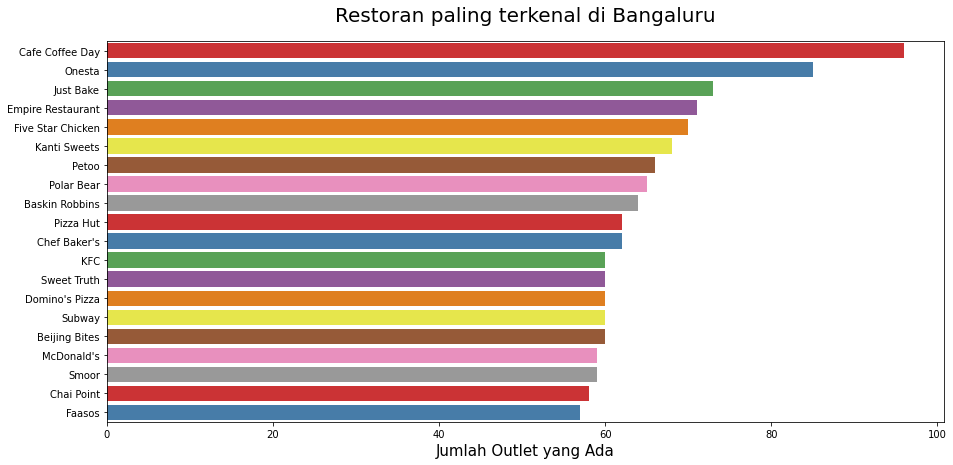

In [ ]:
#Mencari restoran yang paling terkenal 
plt.figure(figsize=(15,7)) #ukuran plot
chains=zomato_orgnl['name'].value_counts()[:20] #melakukan penghitungan keseluruhan dari nama restoran yang ada pada dataset, dan menampilkan hanya 20 restoran dengan nama resto terbanyak
sns.barplot(x=chains,y=chains.index,palette='Set1') #menggunakan fitur barplot
plt.title("Restoran paling terkenal di Bangaluru",size=20,pad=20) 
plt.xlabel("Jumlah Outlet yang Ada",size=15)

**4.2 Menampilkan Jumlah Harga Restoran di Bangalore**

Untuk menampilkan berapa banyak restoran dengan harga termahal, dapat menggunakan fitur `countplot` yang digunakan untuk menjumlah data berdasarkan kategorinya. 

Sehingga lebih mudah dalam menganalisis data secara visual.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Harga Restoran di Bangalore')

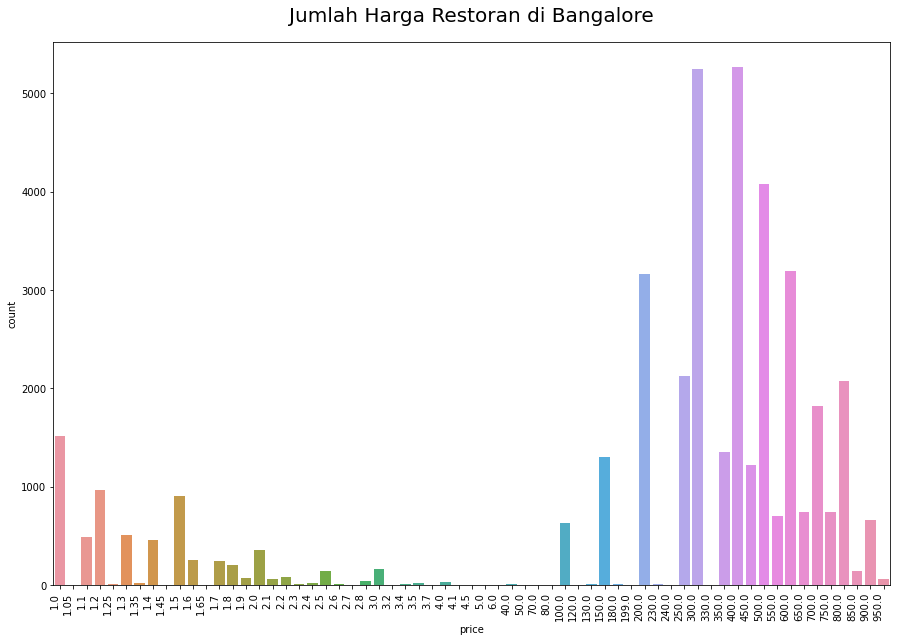

In [ ]:
#Mencari restoran dengan harga termahal
sns.countplot(zomato['price']) #menghitung harga yang ada pada kolom "price"
sns.countplot(zomato['price']).set_xticklabels(sns.countplot(zomato['price']).get_xticklabels(), rotation=90, ha="right") #menghitung dan melakukan plot
fig = plt.gcf() 
fig.set_size_inches(15,10)
plt.title('Jumlah Harga Restoran di Bangalore',size=20,pad=20)

**4.3 Menampilkan Jenis-jenis Layanan yang ada pada restoran di Bangalore**

Untuk menampilkan Jenis-jenis Layanan yang ada pada restoran di Bangalore, dapat menggunakan fitur `countplot` yang digunakan untuk menjumlah data berdasarkan kategorinya. 

Sehingga lebih mudah dalam menganalisis data secara visual.

Dilakukan dengan menganalisa kolom `type`dan mengeksplorasinya


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jenis-Jenis Layanan')

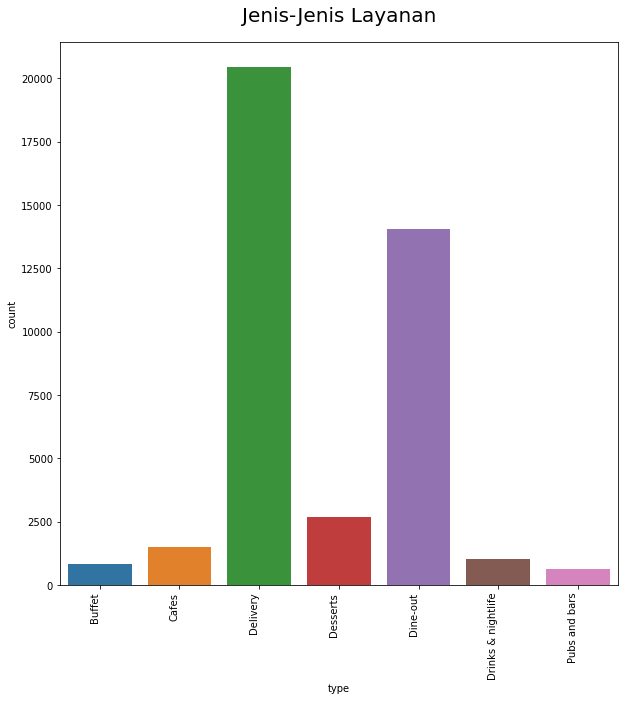

In [ ]:
#Mencari jenis layanan yang ada
sns.countplot(zomato['type']) #menghitung jenis layanan yang ada pada kolom "type"
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right") #menghitung dan melakukan plot
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Jenis-Jenis Layanan',size=20,pad=20)

**4.4 Menampilkan Lokasi yang Paling Sering dikunjungi di Bangalore**

Untuk menampilkan data visualisasi Lokasi yang Paling Sering dikunjungi di Bangalore, dapat menggunakan fitur `barplot` yang dapat digunakan untuk menjelaskan nilai kuantitatif lain atau untuk menjelaskan kategori pada data seperti mean dan persen perubahan.

Di sini akan menampilkan sebanyak 20 lokasi yang paling sering dikunjungi di Bangalore.

Karena dengan menampilkan data ini dapat diambil keputusan bahwa lokasi-lokasi mana saja yang berpotensi untuk dibangun restoran nanti

Text(0.5, 0, 'Jumlah Pengunjung di Lokasi')

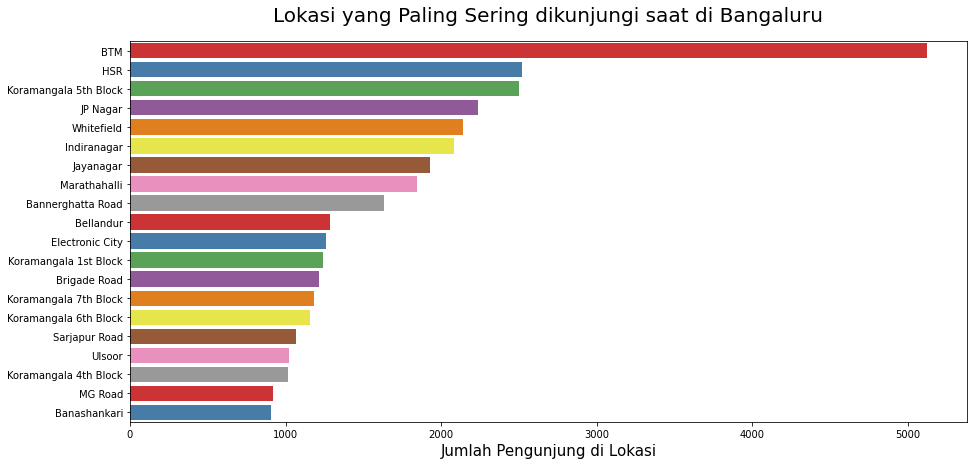

In [ ]:
#Mencari lokasi yang paling sering dikunjungi 
plt.figure(figsize=(15,7)) #ukuran plot
chains=zomato_orgnl['location'].value_counts()[:20] #melakukan penghitungan keseluruhan dari lokasi restoran yang ada pada dataset, dan menampilkan hanya 20 restoran dengan lokasi terbanyak
sns.barplot(x=chains,y=chains.index,palette='Set1') #menggunakan fitur barplot
plt.title("Lokasi yang Paling Sering dikunjungi saat di Bangaluru",size=20,pad=20) 
plt.xlabel("Jumlah Pengunjung di Lokasi",size=15)

**4.5 Masakan paling populer di Bangaluru**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Jumlah Restoran')

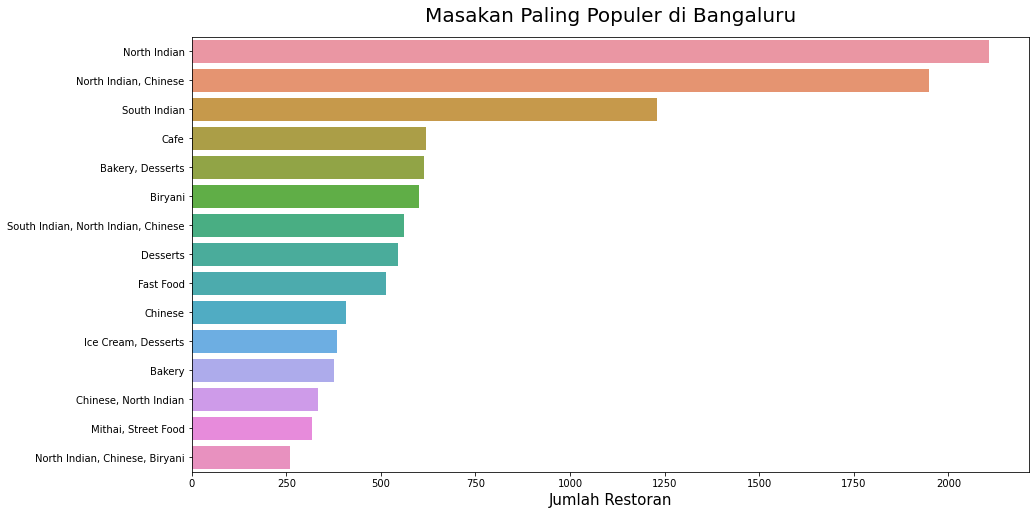

In [ ]:
#menampilkan masakan paling populer
plt.figure(figsize=(15,8))
cuisines=zomato['cuisines'].value_counts()[:15] #menghitung jenis masakan pada tabel "cuisines" dengan menampilkan hanya 15 jenis saja
sns.barplot(cuisines,cuisines.index) #membuat barplot
plt.title('Masakan Paling Populer di Bangaluru', size = 20, pad = 15)
plt.xlabel('Jumlah Restoran',size = 15)

**4.6 Restoran yang memiliki opsi online dan hanya offline**

Untuk menampilkan data visualisasi berapa banyak yang menyediakan jasan online dan offline, dapat menggunakan fitur `countplot` yang digunakan untuk menjumlah data berdasarkan kategorinya.

Di sini akan menampilkan berapa banyak yg menyediakan layanan online.

Karena dengan ini dapat mengetahui bahwa di Bangaluru dominan menyediakan jasa order jenis apa saja.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Restoran yang memiliki opsi jasa Online dan Offline')

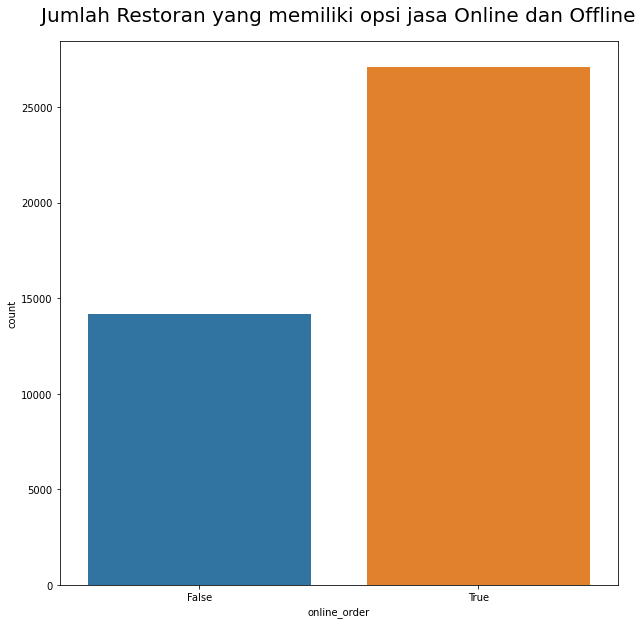

In [ ]:
#Menampilkan restoran yang memiliki opsi order online atau offline
sns.countplot(zomato['online_order']) #menghitung pada tabel "online_order" berapa banyak YES dan berapa banyak NO
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Jumlah Restoran yang memiliki opsi jasa Online dan Offline',size=20,pad=20)

**4.7 Hubungan antara opsi pesanan online dan peringkat restoran**

Untuk menampilkan data visualisasi hubungan antara opsi pesanan onlinedengan peringkat restoran, dapat menggunakan fitur `crosstab` yang digunakan untuk menghitung tabulasi silang sederhana dari dua (atau lebih) faktor. 

Karena dengan mengetahui hubungan antara opsi pesanan online dengan peringkat restoran maka dapat disimpulkan, apakah opsi pesanan online dapat meningkatkan rating suatu restoran.

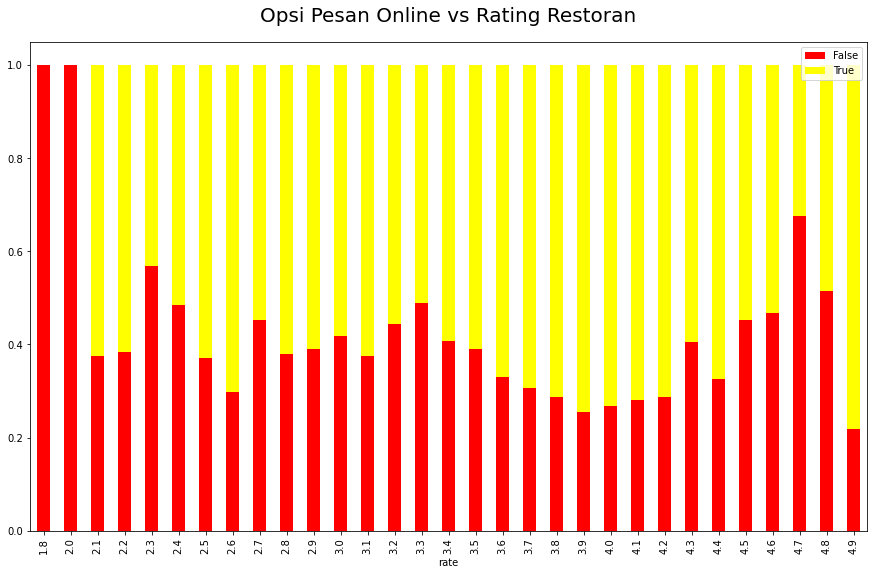

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(zomato['rate'], zomato['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Opsi Pesan Online vs Rating Restoran',size=20,pad=20)
plt.legend(loc="upper right")
plt.show()

**4.8 Hubungan antara type restoran dengan rating restoran**

Untuk menampilkan data visualisasi hubungan antara type restoran dengan rating restoran, dapat menggunakan fitur `crosstab` yang digunakan untuk menghitung tabulasi silang sederhana dari dua (atau lebih) faktor. 

Karena dengan mengetahui hubungan type restoran dengan rating restoran maka dapat disimpulkan, apakah type restoran mempengaruhi tingkatan dari rating restoran

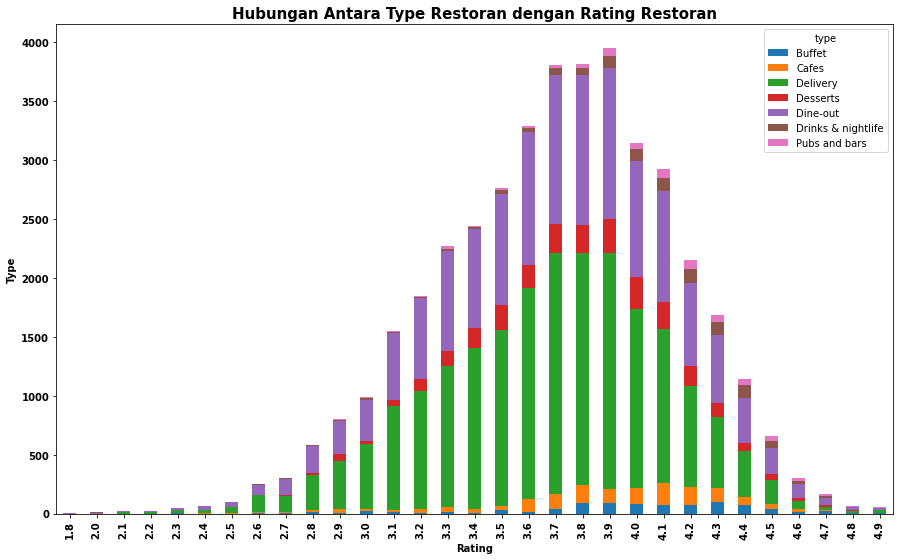

In [ ]:
#melakukan pencarian hubungan antara type restoran dengan rating restoran
type_plt=pd.crosstab(zomato['rate'],zomato['type']) #melakukan crosstab antara table "rate" dan table "type"
type_plt.plot(kind='bar',stacked=True);
plt.title('Hubungan Antara Type Restoran dengan Rating Restoran',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

# REFERENSI

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

https://www.kaggle.com/chirag9073/zomato-restaurants-analysis-and-prediction/notebook

https://ilmudatapy.com/proses-data-cleaning/

https://www.dailysmarty.com/posts/difference-between-independent-and-dependent-variables-in-machine-learning

https://medium.com/@adiptamartulandi/data-preprocessing-pada-machine-learning-handling-categorical-data-ucupstory-6e409dbfd0a0

https://www.statistikian.com/2013/01/transformasi-data.html

https://jagostat.com/statistik-nonparametrik/korelasi-kendall-tau

https://media.neliti.com/media/publications/136040-ID-model-regresi-data-mining-motivasi-belaj.pdf

https://flinsetyadi.com/algoritma-estimasi-dalam-data-mining-linear-regression/

https://medium.com/iykra/mengenal-decision-tree-dan-manfaatnya-b98cf3cf6a8d

http://repository.upnyk.ac.id/275/1/E-14_Survey_jurnal__DM_-SeminarUPN'09.pdf

https://bookdown.org/moh_rosidi2610/Metode_Numerik/dataviz.html